In [189]:
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable

In [190]:
def show_history(history: dict):
    table = PrettyTable()
    for key in history.keys():
        table.add_column(key, history[key])
    print(table)

## Setting the default variables

In [191]:
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "b": [],
    "k_gradient": [],
    "k_lr": [],
    "b_gradient": [],
    "b_lr": [],
}

TARGET_K = 3
TARGET_B = 2

x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
y = TARGET_K * x + TARGET_B


EPOCHS = 100
k = 0.5
b = 0.5

initial_k_lr = 0.01
initial_b_lr = 0.01
k_lr = initial_k_lr
b_lr = initial_b_lr

In [192]:
def plot_result(x, y, y_pred, history):
    plt.close("all")
    fig, ax = plt.subplots(2, 3, figsize=(16, 8))

    ax[0, 0].scatter(x, y, label="target")
    ax[0, 0].plot(x, y_pred, label="predict", color="red")
    ax[0, 0].set_xlabel("x")
    ax[0, 0].set_ylabel("y")
    ax[0, 0].legend()


    ax[0, 0].title.set_text("predict vs target")


    ax[0, 1].scatter(TARGET_K, 0, s=100, label="target K")
    ax[0, 1].axhline(y=0)


    ax[0, 1].scatter(history["k"], history["loss"], label="k")

    ax[0, 1].set_xlabel("k")
    ax[0, 1].set_ylabel("loss")
    ax[0, 1].legend()


    ax[0, 1].title.set_text("k vs loss")


    ax[0, 2].scatter(TARGET_B, 0, s=100, label="target B")

    ax[0, 2].axhline(y=0)

    ax[0, 2].scatter(history["b"], history["loss"], label="b")

    ax[0, 2].set_xlabel("b")

    ax[0, 2].set_ylabel("loss")

    ax[0, 2].legend()

    ax[0, 2].title.set_text("b vs loss")

    ax[1, 0].axhline(y=0, label="0 loss")
    ax[1, 0].plot(
        history["loss"],
        history["epoch"],

        label=f"Loss:\n{history['loss'][-1]:.4f}",
        color="red",
    )
    ax[1, 0].set_xlabel("loss")
    ax[1, 0].set_ylabel("epoch")
    ax[1, 0].legend()


    ax[1, 0].title.set_text("loss vs epoch")


    ax[1, 1].scatter(EPOCHS, 0, s=100, label="0 gradient")
    ax[1, 1].axhline(y=0)


    ax[1, 1].scatter(history["epoch"], history["k_gradient"], label="k gradient")
    ax[1, 1].set_xlabel("epoch")


    ax[1, 1].set_ylabel("k gradient")
    ax[1, 1].legend()


    ax[1, 1].title.set_text("k gradient vs epcoh")


    ax[1, 2].scatter(EPOCHS, 0, s=100, label="0 gradient")

    ax[1, 2].axhline(y=0)

    ax[1, 2].scatter(history["epoch"], history["b_gradient"], label="b gradient")

    ax[1, 2].set_xlabel("epoch")

    ax[1, 2].set_ylabel("b gradient")

    ax[1, 2].legend()

    ax[1, 2].title.set_text("b gradient vs epoch")


    plt.tight_layout()


    plt.show()

USING adaptive learning rate

## The Main Loop

A simple gradient descent implementation. The initialized values for K and B are the same. LR for both are the same. Target values are different (K>B)

Problem: K finds its minima first and the gradients for B update gets smaller, hindering movement towards the minima for B

As we see the K converges much faster than B even tho all of values for them are the same (except gradient calculation). This happens because The relationship of Loss function is much stronger with K than B. It is because K directly scales the X while B is a constant shift

In [193]:
class LRScheduler:
    def __init__(self, initial_lr: float):
        self.initial_lr = initial_lr
        self.lr = initial_lr

    def step(self, epoch: int):
        self.lr = self.initial_lr / (1 - 0.01 * epoch)
        return self.lr


lr_scheduler = LRScheduler(initial_k_lr)

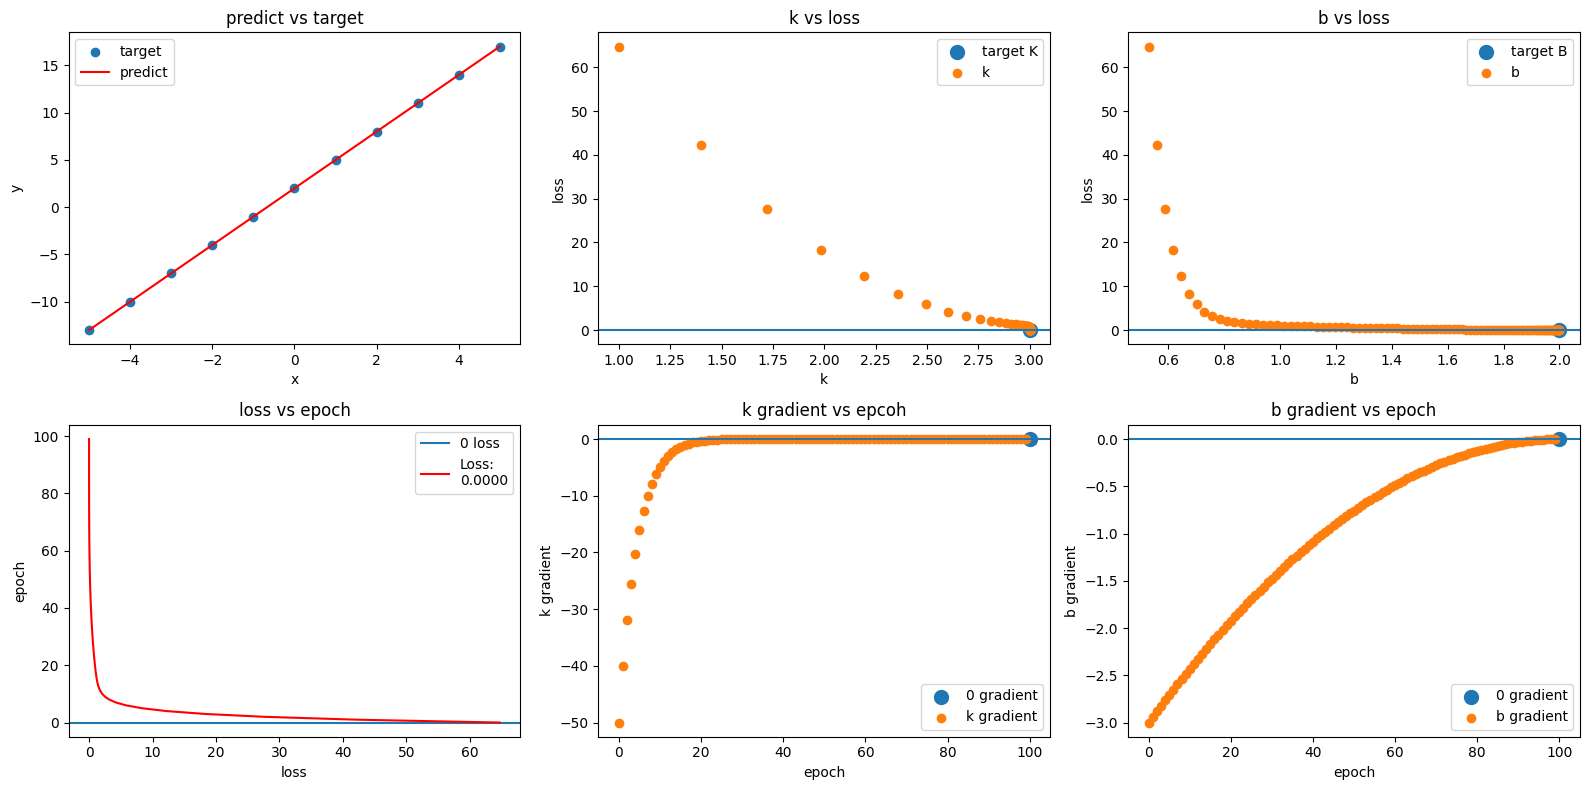

In [194]:
for epoch in range(EPOCHS):
    y_pred = k * x + b

    loss = np.mean((y_pred - y) ** 2)

    errors = y_pred - y

    k_gradient = (2 / len(x)) * np.dot(errors, x)
    b_gradient = (2 / len(x)) * np.sum(errors)

    k = k - k_gradient * k_lr
    b = b - b_gradient * b_lr

    k_lr = lr_scheduler.step(epoch)
    b_lr = lr_scheduler.step(epoch)

    history["epoch"].append(epoch)
    history["k"].append(k)
    history["b"].append(b)
    history["loss"].append(loss)
    history["k_gradient"].append(k_gradient)
    history["k_lr"].append(k_lr)
    history["b_gradient"].append(b_gradient)
    history["b_lr"].append(b_lr)

plot_result(x, y, y_pred, history)

In [195]:
show_history(history)


+-------+------------------------+--------------------+--------------------+-------------------------+----------------------+------------------------+----------------------+
| epoch |          loss          |         k          |         b          |        k_gradient       |         k_lr         |       b_gradient       |         b_lr         |
+-------+------------------------+--------------------+--------------------+-------------------------+----------------------+------------------------+----------------------+
|   0   |         64.75          |        1.0         |        0.53        |          -50.0          |         0.01         |          -3.0          |         0.01         |
|   1   |        42.1609         |        1.4         |       0.5594       |          -40.0          | 0.010101010101010102 |  -2.9399999999999986   | 0.010101010101010102 |
|   2   |      27.67532836       | 1.7232323232323232 | 0.5885030303030303 |          -32.0          | 0.010204081632653062 |  -2.